### Name : Limalka Sadith
### Index No : 190538N

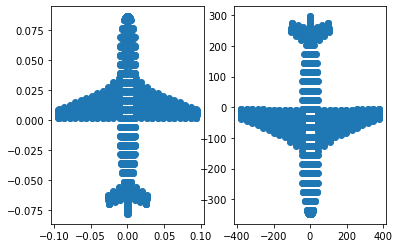

In [2]:
#Q1
from plyfile import PlyData, PlyElement
import numpy as np
import matplotlib.pyplot as plt

pcd = PlyData.read('airplane.ply')
assert pcd is not None
points = np.concatenate((pcd['vertex']['x'].reshape(1,-1),pcd['vertex']['y'].reshape(1,-1),pcd['vertex']['z'].reshape(1,-1)),axis = 0)
points = points - np.mean(points,axis=1).reshape(3,1)

ones = np.ones((1,points.shape[1]))
X = np.concatenate((points,ones),axis=0)

R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])

P1 = K @ np.concatenate((R,t),axis=1)

R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[0.5,0,0],[0,0.5,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])

P2 = K @ np.concatenate((R,t),axis=1)

x1 = P1 @ X
x2 = P2 @ X
x1 = x1/x2[2,:]
x1 = x2/x2[2,:]

# fig,ax = plt.subplots(1,2,sharex=True,sharey=True)
fig,ax = plt.subplots(1,2)
ax[0].scatter(x1[0,:],x1[1,:])
ax[1].scatter(x2[0,:],x2[1,:])
# ax.axis('equal')
plt.show()


Text(0.5, 0, 'z')

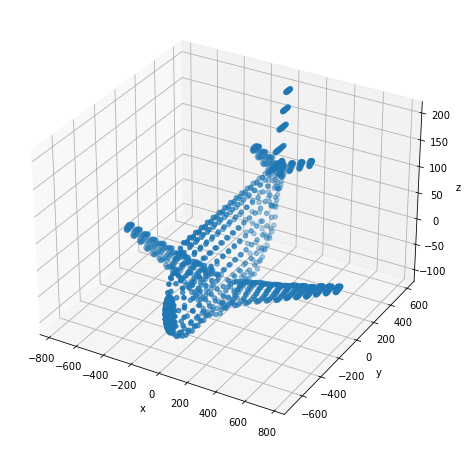

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[0,:],points[1,:],points[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [5]:
#Q3
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('earrings.jpg', cv.IMREAD_COLOR)
assert img is not None

hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
ts, bw = cv.threshold(hsv[:,:,1],-0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)

w = 5
kernal = np.ones((w,w),np.uint8)
opened = cv.morphologyEx(bw,cv.MORPH_CLOSE,kernal)

retval, labels, stats, centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)

# plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
# plt.show()

Z = 720
f = 8

for i,s in enumerate(stats):
    if i != 0:
        print('Item',i,', area in pixel =', s[4])
        print('Item',i,', area in mm^2 =', s[4]*(2.2e-3)**2*(Z*Z)/(f*f))


cv.imshow("image",img)
cv.waitKey(0)
cv.imshow("image",hsv[:,:,1])
cv.waitKey(0) 
cv.imshow("image",bw)
cv.waitKey(0) 
cv.imshow("image",opened)
cv.waitKey(0)
cv.imshow("image",colormapped)
cv.waitKey(0) 
cv.destroyAllWindows()

Item 1 , area in pixel = 59143
Item 1 , area in mm^2 = 2318.642172
Item 2 , area in pixel = 59211
Item 2 , area in mm^2 = 2321.3080440000003


(0, 0, 0, 0)
AAAAAAA
jfdhgjshgj


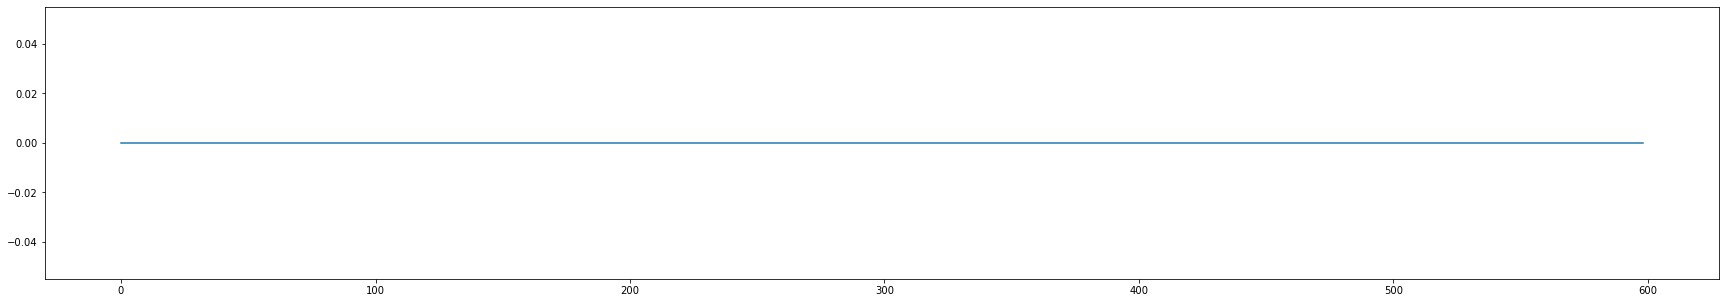

In [5]:
import cv2 as cv
import numpy as np 
import matplotlib . pyplot as plt

file_name = 'allenkeys.jpg'
im = cv . imread ( file_name , cv .IMREAD_REDUCED_GRAYSCALE_2) 
canny = cv . Canny( im, 50 , 150)

# Copy edges to the images that wi l l display the resul ts in BGR 
canny_color = cv . cvtColor ( canny , cv .COLOR_GRAY2BGR)
lines = cv . HoughLines ( canny , 1 , np . pi / 180 , 170 , None , 0 , 0) 
if lines is not None :
    for i in range (0, len(lines)):
        rho = lines [i][0][0]
        theta = lines [i][0][1] 
        a = np . cos (theta)
        b = np . sin (theta) 
        x0 = a * rho
        y0 = b * rho 
        pt1 = (int(x0 + 1000*(-b ) ) , int ( y0 + 1000*(a )))
        pt2 = (int(x0 - 1000*(-b ) ) , int ( y0 - 1000*(a ))) 
        cv . line ( canny_color , pt1 , pt2 , (0 ,0 ,255) , 1 , cv .LINE_AA)

cv.namedWindow( 'Image' , cv.WINDOW_AUTOSIZE) 
cv.imshow('Image', im)
cv.waitKey(0) 
cv.imshow(' Image', canny )
cv.waitKey(0) 
cv.imshow('Image' , canny_color )
cv.waitKey(0)
r = cv.selectROI ( 'Image' , canny_color , showCrosshair = True , fromCenter = False ) 
print (r)
print("AAAAAAA")
x0 , y0 = int ( r [ 0 ] + r [ 2 ] / 2 ) , int ( r [ 1 ] + r [ 3 ] / 2 ) 
m = b / a # Gradient
m = np . tan (np . median (lines [ : , 0 , 1 ])) 
c = y0 = m*x0 # Intercept

cv.line (canny_color , (0 , int ( c ) ) , ( im. shape [ 0 ] , int (m*im. shape [ 0 ] + c ) ) , (0 ,255 ,0) , 2 , cv .LINE_AA)
print("jfdhgjshgj")
cv.imshow('Image', canny_color )
cv.waitKey (0) 
cv.destroyAllWindows()

dy = 1
y_sub_pixel = np.arange (0 , im.shape[0] - 1 , dy ) 
f_sub_pixel = np . zeros_like( y_sub_pixel )
f_sub_pixel_nn = np . zeros_like ( y_sub_pixel ) 
# https : / / youtu . be / v9CFu4r6tPY

for i , y in enumerate ( y_sub_pixel ) :
    pass
    # Your code hear to generate the pixe l values along the line

fig , ax = plt.subplots (figsize =(30 ,5)) 
ax.plot(f_sub_pixel_nn )
# Your code hear to compute the widths . Keep in mind of the angle .